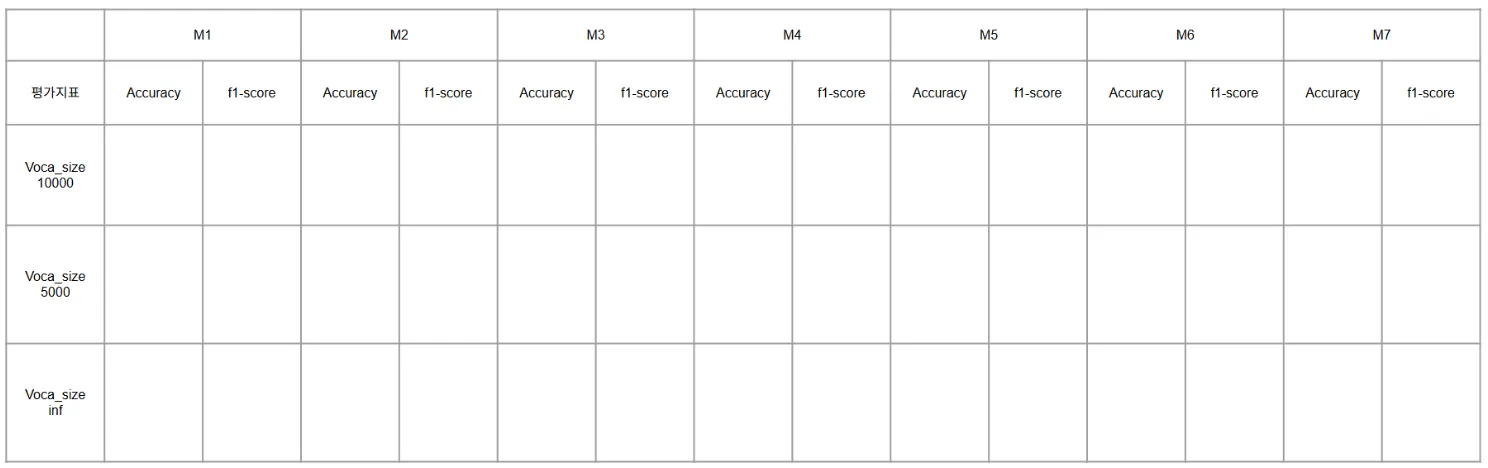[링크 텍스트](https://)

# 오늘의 실험은 너~무 길었다

제일좋은 모델은 Logistic Regression 이었다


1. 선형 모델은 고차원 희소 벡터에 강하다    
BoW나 TF-IDF처럼 벡터화된 뉴스 데이터는 대부분 **희소(sparse)**하고 고차원입니다.    
Logistic Regression은 이러한 희소 고차원 데이터에서도 잘 작동하는 모델입니다.    
특히 각 단어가 중요한 신호(피처) 역할을 하기 때문에, 단어-클래스 간의 직접적인 관계를 잘 포착합니다.    
    
2. 복잡한 모델은 오히려 과적합되기 쉬움    
SVM, RandomForest, 심층 신경망 등은 복잡한 구조로 인해 **소규모 단어 집합(vocab size 작을 때)**일 때 학습이 충분치 않거나, 반대로 **너무 많은 피처(vocab size 클 때)**일 경우 과적합될 수 있습니다.    
반면, Logistic Regression은 비교적 규제가 쉬운 모델로, 고차원에서도 안정적으로 일반화할 수 있습니다.    
    
3. 다중 클래스 소프트맥스(Logistic Regression의 확장) 구조가 효과적
다중 클래스 분류 문제에서는 Logistic Regression이 Softmax Regression 형태로 확장됩니다.
각 클래스마다 확률을 계산하므로, 클래스 수가 많아도 잘 작동합니다.    
특히 Reuters 데이터처럼 각 클래스에 고유 단어 특징이 있는 경우, Logistic Regression은 이를 효율적으로 선형 경계로 분리할 수 있습니다.    

#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)    

### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

10000: 은서    
5000: 경호    
3000: 영표    
inf: 기웅    

| Vocabulary Size | Model                     | Accuracy | F1-Score |
|------------------|----------------------------|----------|----------|
| 10000           | ComplementNB               | 0.7707   | 0.7457   |
|                 | LogisticRegression         | 0.8085   | 0.8023   |
|                 | LinearSVC                  | 0.7809   | 0.7771   |
|                 | DecisionTreeClassifier     | 0.6202   | 0.5776   |
|                 | RandomForestClassifier     | 0.6741   | 0.6429   |
|                 | GradientBoostingClassifier | 0.7671   | 0.7637   |
|                 | VotingClassifier           | 0.7947   | 0.7907   |
|                 | XGBoost                    | 0.7930   | 0.7856   |
| 5000            | ComplementNB               | 0.7707   | 0.7459   |
|                 | LogisticRegression         | 0.8054   | 0.7993   |
|                 | LinearSVC                  | 0.7716   | 0.7672   |
|                 | DecisionTreeClassifier     | 0.6180   | 0.5730   |
|                 | RandomForestClassifier     | 0.7012   | 0.6770   |
|                 | GradientBoostingClassifier | 0.7667   | 0.7650   |
|                 | VotingClassifier           | 0.7961   | 0.7922   |
|                 | XGBoost                    | 0.7961   | 0.7897   |
| 3000            | ComplementNB               | 0.7645   | 0.7370   |
|                 | LogisticRegression         | 0.7916   | 0.7855   |
|                 | LinearSVC                  | 0.7578   | 0.7555   |
|                 | DecisionTreeClassifier     | 0.6260   | 0.5800   |
|                 | RandomForestClassifier     | 0.6857   | 0.6592   |
|                 | GradientBoostingClassifier | 0.6857   | 0.7684   |
|                 | VotingClassifier           | 0.8032   | 0.7862   |
|                 | XGBoost                    | 0.7885   | 0.7816   |
| All words (NaN) | ComplementNB               | 0.7649   | 0.7347   |
|                 | LogisticRegression         | 0.8112   | 0.8055   |
|                 | LinearSVC                  | 0.7956   | 0.7916   |
|                 | DecisionTreeClassifier     | 0.6211   | 0.5769   |
|                 | RandomForestClassifier     | 0.6545   | 0.6226   |
|                 | GradientBoostingClassifier | 0.7680   | 0.7627   |
|                 | VotingClassifier           | 0.8054   | 0.8007   |
|                 | XGBoost                    | 0.7939   | 0.7877   |






2. 딥러닝과 머신런닝의 차이 비교하기
- 벡터화 방법을 바꿔보며(DTM, W2V) 머신러닝 모델1개(성능 잘나온 친구) , 딥러닝 모델 2개(Dense, RNN)를 비교해보세요 평가지표 = accuacry, f1-score

### 📊 벡터화 방법별 ML/DL 모델 성능 비교 (Accuracy / F1-score)

| Vectorization | Model           | Accuracy | F1-Score |
|---------------|------------------|----------|----------|
| Word2Vec      | ML Model (ex. XGBoost) |          |          |
|               | Dense NN         |          |          |
|               | RNN              |          |          |

# 데이터셋 만들기

In [41]:
!pip install gensim

In [42]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC

# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비
## W2V 학습데이터 준비

In [44]:
# 이부분에있는 num_words를 5000과 다른방법으로 바꿔보세요~ default가 inf

(x_train, y_train), (x_test, y_test) = reuters.load_data(test_split=0.2) ##

In [45]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

In [46]:
index_to_word = { index+3 : word for word, index in word_index.items() }
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [47]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [48]:
decoded_test = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded_test.append(t)

x_test = decoded_test
print(len(x_test))

2246


In [49]:
# 벡터화 DTM, TF-idf 방법
dtmvector = CountVectorizer()

tfidf_transformer = TfidfTransformer()

x_train_dtm = dtmvector.fit_transform(x_train)
x_test_dtm= dtmvector.transform(x_test)

x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [50]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

In [51]:
# 벡터화 W2V방법
from gensim.models import Word2Vec

# 우선 문장을 토큰화 시킵시다 띄어쓰기 기반으로 해볼게요! -> # 위에서 DTM만들때는 왜 안해줬냐! -> CountVectorizer에서 띄어쓰기 기반 토큰화가 내장되있음
x_train_tokenized = [sentence.split() for sentence in x_train]
x_test_tokenized = [sentence.split() for sentence in x_test]

# vector사이즈를 늘리거나 줄여보세요 아마 512 가장많이쓰이는 방식
model = Word2Vec(sentences = x_train_tokenized, vector_size = 256, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


In [52]:
# W2V이 잘되었는지 확인 -> 여차저차 되긴한것같다
model_result = model.wv.most_similar('man')
print(model_result)

[('image', 0.8483685851097107), ('hall', 0.821050763130188), ('sydney', 0.8189356923103333), ('cooperative', 0.8183913826942444), ('haas', 0.8176114559173584), ('associations', 0.811566948890686), ('moore', 0.8108506202697754), ('gerard', 0.8090413808822632), ('santiago', 0.808144748210907), ('colony', 0.8062847852706909)]


In [53]:
# 학습된 Word2Vec 모델
w2v_model = model

# 각 문장을 벡터화 시키는 코드
def vectorize_sentence(sentence, model, max_len):
    vecs = []
    for word in sentence:
        if word in model.wv:
            vecs.append(model.wv[word])
        else:
            vecs.append(np.zeros(model.vector_size))
    # Padding
    if len(vecs) < max_len:
        vecs += [np.zeros(model.vector_size)] * (max_len - len(vecs))
    else:
        vecs = vecs[:max_len]
    return np.array(vecs)


# 최대 문장길이를 잘 잡아주세요
x_train_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_train_tokenized])
x_test_w2v = np.array([vectorize_sentence(s, w2v_model, max_len=100) for s in x_test_tokenized])




In [54]:
x_train_w2v.shape

(8982, 100, 256)

In [55]:
x_test_w2v.shape

(2246, 100, 256)

# 모델 정의 및 실험
머신러닝 실험은 저번 코드를 참고해주세요~

두번째 실험에 대해서만 다루겠습니다

In [56]:
cb = ComplementNB()
cb.fit(x_train_tfidf, y_train)

ComplementNB()

In [57]:
y_pred = cb.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7649
✅ F1-score : 0.7347


In [58]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(x_train_tfidf, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [59]:
y_pred = lr.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.8112
✅ F1-score : 0.8055


In [60]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(x_train_tfidf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [61]:
y_pred = lsvc.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7956
✅ F1-score : 0.7916


In [62]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train_tfidf, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [63]:
y_pred = tree.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.6211
✅ F1-score : 0.5769


In [64]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(x_train_tfidf, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [65]:
y_pred = forest.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.6545
✅ F1-score : 0.6226


In [66]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(x_train_tfidf, y_train)

GradientBoostingClassifier(random_state=0)

In [67]:
y_pred = grbt.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7680
✅ F1-score : 0.7627


In [68]:
log_clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
nb_clf = ComplementNB()
gb_clf = GradientBoostingClassifier()

# Voting Classifier 선언
voting_classifier = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('nb', nb_clf),
        ('gb', gb_clf)
    ],
    voting='soft'
)
voting_classifier.fit(x_train_tfidf, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', ComplementNB()),
                             ('gb', GradientBoostingClassifier())],
                 voting='soft')

In [69]:
y_pred = voting_classifier.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.8054
✅ F1-score : 0.8007


In [70]:
# TF-idf데이터로 XGBoost 모델 학습하기

# 이친구도 시간좀 걸립니다!

from xgboost import XGBClassifier

# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
# 예측
y_pred = xgb_model.predict(x_test_tfidf)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7939
✅ F1-score : 0.7877


In [72]:
# 데이터를 단어단위에서 문장단위로 바꿔줘야합니다.. ML은 2차원데이터만 받을수있기때문
# 문장에 대해서 토큰들의 벡터를 평균을 취해줍니다.

# Word2Vec 임베딩 시퀀스: (8982, 100, 256)
x_w2v_seq_train = x_train_w2v
x_w2v_seq_test = x_test_w2v
# 평균 풀링 → (8982, 256)
x_w2v_avg_train = np.mean(x_w2v_seq_train, axis=1)
x_w2v_avg_test = np.mean(x_w2v_seq_test, axis=1)
print(x_w2v_avg_train.shape)  # (8982, 256)

(8982, 256)


In [73]:
# Word2Vec 데이터로 XGBoost 모델 학습하기
from xgboost import XGBClassifier


# XGBoost 모델 학습
xgb_model = XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss')
xgb_model.fit(x_w2v_avg_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [74]:
# 예측
y_pred = xgb_model.predict(x_w2v_avg_test)

# 평가 지표
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy : {acc:.4f}")
print(f"✅ F1-score : {f1:.4f}")

✅ Accuracy : 0.7253
✅ F1-score : 0.7068


# Dense NN 딥러닝 모델

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Dense, Dropout


dense_model = Sequential([
    Flatten(input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요!
])

dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,179,310 (50.28 MB)

 Trainable params: 13,179,310 (50.28 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# 시간이 좀 걸립니다! 한 20분정도..
dense_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5316 - loss: 2.2534 - val_accuracy: 0.6650 - val_loss: 1.4680
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6860 - loss: 1.3209 - val_accuracy: 0.6683 - val_loss: 1.4285
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7479 - loss: 1.0715 - val_accuracy: 0.6923 - val_loss: 1.3816
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7849 - loss: 0.8745 - val_accuracy: 0.6950 - val_loss: 1.4094
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8249 - loss: 0.7126 - val_accuracy: 0.6956 - val_loss: 1.4872
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8516 - loss: 0.6043 - val_accuracy: 0.6917 - val_loss: 1.5603
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8681 - loss: 0.5347 - val_accuracy: 0.6873 - val_loss: 1.5448
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8801 - loss: 0.4979 - val_accuracy: 0

In [25]:
y_pred_proba = dense_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
✅ Accuracy: 0.6879
✅ F1-score: 0.6707


5에폭    
✅ Accuracy: 0.6879    
✅ F1-score: 0.6580    
10에폭       
✅ Accuracy: 0.7124     
✅ F1-score: 0.6806    
20에폭    
✅ Accuracy: 0.6768     
✅ F1-score: 0.6543      
30에폭       
✅ Accuracy: 0.6790    
✅ F1-score: 0.6649   

# RNN 딥러닝 모델

In [26]:
# rnn 시계열 특징 데이터 특화 모델

rnn_model = Sequential([
    LSTM(128, input_shape=(100, 256)),  # (seq_len, embedding_dim)
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(46, activation='softmax')   # 클래스 수에 맞게 조정 46개로 맞춰주세요~
])

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 208,366 (813.93 KB)

 Trainable params: 208,366 (813.93 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# 시간이 좀 걸립니다! 한 20분정도
rnn_model.fit(x_train_w2v, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3774 - loss: 2.6533 - val_accuracy: 0.5565 - val_loss: 1.8645
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5450 - loss: 1.8736 - val_accuracy: 0.6450 - val_loss: 1.5210
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6282 - loss: 1.5535 - val_accuracy: 0.6628 - val_loss: 1.3960
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6572 - loss: 1.3894 - val_accuracy: 0.6772 - val_loss: 1.4097
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6744 - loss: 1.3709 - val_accuracy: 0.6906 - val_loss: 1.3011
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6971 - loss: 1.2714 - val_accuracy: 0.7056 - val_loss: 1.2248
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7052 - loss: 1.2093 - val_accuracy: 0.7346 - val_loss: 1.1585
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7356 - loss: 1.0984 - val_accura

# 로스가 떨어지는 폭을 보아하니 좀더 돌리면 점수가 더 높게 나올것같습니다!

여기까지 실험하고 시간이 좀 남으시는 분들만 실험해보시길

In [24]:

y_pred_proba = rnn_model.predict(x_test_w2v)
y_pred = np.argmax(y_pred_proba, axis=1)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy: {acc:.4f}")
print(f"✅ F1-score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
✅ Accuracy: 0.7124
✅ F1-score: 0.6806


10에폭    
✅ Accuracy: 0.7124         
✅ F1-score: 0.6806    
20에폭     
✅ Accuracy: 0.7667    
✅ F1-score: 0.7481    
30에폭    
✅ Accuracy: 0.7769  
✅ F1-score: 0.7666    
40에폭
✅ Accuracy: 0.7716    
✅ F1-score: 0.7605